In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np


# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Only look at 3s and 8s
train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


In [2]:
from keras.wrappers.scikit_learn import KerasClassifier

def make_model( ):    
    dense_layer_sizes = [64]
    pool_size = (2, 2)
    filters = 8
    kernel_size = (3, 3)
    
    model = Sequential()
    model.add(Conv2D(4, kernel_size,activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])    
    
    return model


In [3]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.grid_search import GridSearchCV

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

# my_classifier = KerasClassifier(make_model,batch_size=128, epochs=12)
my_classifier = KerasClassifier(make_model)
grid = GridSearchCV(my_classifier,param_grid=param_grid, 
#                   scoring='accuracy',
                    scoring='neg_log_loss',                    
#                   scoring='roc_auc',
                    n_jobs=1)

In [4]:
grid_result=grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/10
8148/8148 [==============================] - 5s - loss: 0.1445 - acc: 0.9493     
Epoch 2/10
8148/8148 [==============================] - 3s - loss: 0.0830 - acc: 0.9730     
Epoch 3/10
8148/8148 [==============================] - 3s - loss: 0.0842 - acc: 0.9745     
Epoch 4/10
8148/8148 [==============================] - 3s - loss: 0.0741 - acc: 0.9782     
Epoch 5/10
8148/8148 [==============================] - 3s - loss: 0.0745 - acc: 0.9799     
Epoch 6/10
8148/8148 [==============================] - 3s - loss: 0.0694 - acc: 0.9797     
Epoch 7/10
8148/8148 [==============================] - 3s - loss: 0.0674 - acc: 0.9811     
Epoch 8/10
8148/8148 [==============================] - 3s - loss: 0.0679 - acc: 0.9804     
Epoch 9/10
8148/8148 [==============================] - 3s - loss: 0.0663 - acc: 0.9806     
Epoch 10/10
8148/8148 [==============================] - 0s     
Epoch 1/10
8149/8149 [==============================] - 3s - loss: 0.1469 - acc: 0.9482     
Epoch

8149/8149 [==============================] - 3s - loss: 0.0349 - acc: 0.9914     
Epoch 42/50
8149/8149 [==============================] - 3s - loss: 0.0285 - acc: 0.9921     
Epoch 43/50
8149/8149 [==============================] - 3s - loss: 0.0324 - acc: 0.9929     
Epoch 44/50
8149/8149 [==============================] - 3s - loss: 0.0324 - acc: 0.9920     
Epoch 45/50
8149/8149 [==============================] - 3s - loss: 0.0342 - acc: 0.9920     
Epoch 46/50
8149/8149 [==============================] - 3s - loss: 0.0298 - acc: 0.9925     
Epoch 47/50
8149/8149 [==============================] - 3s - loss: 0.0334 - acc: 0.9925     
Epoch 48/50
8149/8149 [==============================] - 3s - loss: 0.0332 - acc: 0.9921     
Epoch 49/50
8149/8149 [==============================] - 3s - loss: 0.0276 - acc: 0.9928     
Epoch 50/50
8148/8148 [==============================] - 4s - loss: 0.1427 - acc: 0.9515     
Epoch 2/100
8148/8148 [==============================] - 3s - loss: 0.07

8149/8149 [==============================] - 3s - loss: 0.0224 - acc: 0.9941     
Epoch 62/100
8149/8149 [==============================] - 3s - loss: 0.0264 - acc: 0.9929     
Epoch 63/100
8149/8149 [==============================] - 3s - loss: 0.0244 - acc: 0.9929     
Epoch 64/100
8149/8149 [==============================] - 3s - loss: 0.0219 - acc: 0.9947     
Epoch 65/100
8149/8149 [==============================] - 3s - loss: 0.0211 - acc: 0.9945     
Epoch 66/100
8149/8149 [==============================] - 3s - loss: 0.0180 - acc: 0.9941     
Epoch 67/100
8149/8149 [==============================] - 3s - loss: 0.0222 - acc: 0.9937     
Epoch 68/100
8149/8149 [==============================] - 3s - loss: 0.0182 - acc: 0.9945     
Epoch 69/100
8149/8149 [==============================] - 3s - loss: 0.0253 - acc: 0.9933     
Epoch 70/100
8149/8149 [==============================] - 3s - loss: 0.0213 - acc: 0.9936     
Epoch 71/100
8149/8149 [==============================] - 3s - 

8148/8148 [==============================] - 2s - loss: 0.1542 - acc: 0.9444     
Epoch 2/50
8148/8148 [==============================] - 1s - loss: 0.0795 - acc: 0.9752     
Epoch 3/50
8148/8148 [==============================] - 1s - loss: 0.0666 - acc: 0.9789     
Epoch 4/50
8148/8148 [==============================] - 1s - loss: 0.0635 - acc: 0.9797     
Epoch 5/50
8148/8148 [==============================] - 1s - loss: 0.0606 - acc: 0.9816     
Epoch 6/50
8148/8148 [==============================] - 1s - loss: 0.0505 - acc: 0.9844     
Epoch 7/50
8148/8148 [==============================] - 1s - loss: 0.0522 - acc: 0.9836     
Epoch 8/50
8148/8148 [==============================] - 1s - loss: 0.0503 - acc: 0.9845     
Epoch 9/50
8148/8148 [==============================] - 1s - loss: 0.0508 - acc: 0.9844     
Epoch 10/50
8148/8148 [==============================] - 1s - loss: 0.0463 - acc: 0.9855     
Epoch 11/50
8148/8148 [==============================] - 1s - loss: 0.0425 - acc

8148/8148 [==============================] - 1s - loss: 0.0342 - acc: 0.9896     
Epoch 24/100
8148/8148 [==============================] - 1s - loss: 0.0328 - acc: 0.9899     
Epoch 25/100
8148/8148 [==============================] - 1s - loss: 0.0308 - acc: 0.9913     
Epoch 26/100
8148/8148 [==============================] - 1s - loss: 0.0324 - acc: 0.9908     
Epoch 27/100
8148/8148 [==============================] - 1s - loss: 0.0316 - acc: 0.9893     
Epoch 28/100
8148/8148 [==============================] - 1s - loss: 0.0329 - acc: 0.9917     
Epoch 29/100
8148/8148 [==============================] - 1s - loss: 0.0246 - acc: 0.9904     
Epoch 30/100
8148/8148 [==============================] - 2s - loss: 0.0299 - acc: 0.9904     
Epoch 31/100
8148/8148 [==============================] - 1s - loss: 0.0311 - acc: 0.9910     
Epoch 32/100
8148/8148 [==============================] - 1s - loss: 0.0281 - acc: 0.9907     
Epoch 33/100
8148/8148 [==============================] - 1s - 

8149/8149 [==============================] - 1s - loss: 0.0183 - acc: 0.9946     
Epoch 95/100
8149/8149 [==============================] - 1s - loss: 0.0192 - acc: 0.9948     
Epoch 96/100
8149/8149 [==============================] - 1s - loss: 0.0199 - acc: 0.9944     
Epoch 97/100
8149/8149 [==============================] - 1s - loss: 0.0160 - acc: 0.9948     
Epoch 98/100
8149/8149 [==============================] - 1s - loss: 0.0217 - acc: 0.9939     
Epoch 99/100
8149/8149 [==============================] - 1s - loss: 0.0202 - acc: 0.9939     
Epoch 100/100
8149/8149 [==============================] - 2s - loss: 0.1718 - acc: 0.9332     
Epoch 2/100
8149/8149 [==============================] - 1s - loss: 0.0795 - acc: 0.9735     
Epoch 3/100
8149/8149 [==============================] - 1s - loss: 0.0706 - acc: 0.9752     
Epoch 4/100
8149/8149 [==============================] - 2s - loss: 0.0649 - acc: 0.9768     
Epoch 5/100
8149/8149 [==============================] - 1s - los

8148/8148 [==============================] - 0s - loss: 0.0370 - acc: 0.9914     
Epoch 35/50
8148/8148 [==============================] - 1s - loss: 0.0343 - acc: 0.9909     
Epoch 36/50
8148/8148 [==============================] - 1s - loss: 0.0325 - acc: 0.9912     
Epoch 37/50
8148/8148 [==============================] - 1s - loss: 0.0316 - acc: 0.9915     
Epoch 38/50
8148/8148 [==============================] - 0s - loss: 0.0334 - acc: 0.9915     
Epoch 39/50
8148/8148 [==============================] - 0s - loss: 0.0293 - acc: 0.9925     
Epoch 40/50
8148/8148 [==============================] - 0s - loss: 0.0288 - acc: 0.9920     
Epoch 41/50
8148/8148 [==============================] - 0s - loss: 0.0328 - acc: 0.9915     
Epoch 42/50
8148/8148 [==============================] - 1s - loss: 0.0308 - acc: 0.9918     
Epoch 43/50
8148/8148 [==============================] - 0s - loss: 0.0317 - acc: 0.9931     
Epoch 44/50
8148/8148 [==============================] - 0s - loss: 0.03

8148/8148 [==============================] - 1s - loss: 0.0295 - acc: 0.9907     
Epoch 55/100
8148/8148 [==============================] - 1s - loss: 0.0264 - acc: 0.9908     
Epoch 56/100
8148/8148 [==============================] - 1s - loss: 0.0268 - acc: 0.9919     
Epoch 57/100
8148/8148 [==============================] - 1s - loss: 0.0258 - acc: 0.9919     
Epoch 58/100
8148/8148 [==============================] - 1s - loss: 0.0281 - acc: 0.9907     
Epoch 59/100
8148/8148 [==============================] - 1s - loss: 0.0263 - acc: 0.9919     
Epoch 60/100
8148/8148 [==============================] - 1s - loss: 0.0262 - acc: 0.9914     
Epoch 61/100
8148/8148 [==============================] - 1s - loss: 0.0245 - acc: 0.9917     
Epoch 62/100
8148/8148 [==============================] - 1s - loss: 0.0266 - acc: 0.9913     
Epoch 63/100
8148/8148 [==============================] - 1s - loss: 0.0264 - acc: 0.9925     
Epoch 64/100
8148/8148 [==============================] - 1s - 

8149/8149 [==============================] - 1s - loss: 0.0421 - acc: 0.9880     
Epoch 25/100
8149/8149 [==============================] - 1s - loss: 0.0400 - acc: 0.9896     
Epoch 26/100
8149/8149 [==============================] - 1s - loss: 0.0404 - acc: 0.9899     
Epoch 27/100
8149/8149 [==============================] - 1s - loss: 0.0456 - acc: 0.9872     
Epoch 28/100
8149/8149 [==============================] - 0s - loss: 0.0372 - acc: 0.9897     
Epoch 29/100
8149/8149 [==============================] - 1s - loss: 0.0382 - acc: 0.9894     
Epoch 30/100
8149/8149 [==============================] - 1s - loss: 0.0367 - acc: 0.9898     
Epoch 31/100
8149/8149 [==============================] - 1s - loss: 0.0361 - acc: 0.9907     
Epoch 32/100
8149/8149 [==============================] - 1s - loss: 0.0380 - acc: 0.9890     
Epoch 33/100
8149/8149 [==============================] - 0s - loss: 0.0381 - acc: 0.9899     
Epoch 34/100
8149/8149 [==============================] - 1s - 

8149/8149 [==============================] - 1s - loss: 0.2031 - acc: 0.9308     
Epoch 2/10
8149/8149 [==============================] - 0s - loss: 0.0760 - acc: 0.9744     
Epoch 3/10
8149/8149 [==============================] - 0s - loss: 0.0618 - acc: 0.9810     
Epoch 4/10
8149/8149 [==============================] - 0s - loss: 0.0588 - acc: 0.9800     
Epoch 5/10
8149/8149 [==============================] - 0s - loss: 0.0564 - acc: 0.9821     
Epoch 6/10
8149/8149 [==============================] - 0s - loss: 0.0481 - acc: 0.9853     
Epoch 7/10
8149/8149 [==============================] - 0s - loss: 0.0474 - acc: 0.9838     
Epoch 8/10
8149/8149 [==============================] - 0s - loss: 0.0476 - acc: 0.9820     
Epoch 9/10
8149/8149 [==============================] - 0s - loss: 0.0460 - acc: 0.9852     
Epoch 10/10
8149/8149 [==============================] - 1s - loss: 0.2528 - acc: 0.9044     
Epoch 2/10
8149/8149 [==============================] - 0s - loss: 0.0742 - acc:

8149/8149 [==============================] - 0s - loss: 0.0441 - acc: 0.9879     
Epoch 16/50
8149/8149 [==============================] - 0s - loss: 0.0406 - acc: 0.9898     
Epoch 17/50
8149/8149 [==============================] - 0s - loss: 0.0454 - acc: 0.9881     
Epoch 18/50
8149/8149 [==============================] - 0s - loss: 0.0435 - acc: 0.9893     
Epoch 19/50
8149/8149 [==============================] - 0s - loss: 0.0371 - acc: 0.9906     
Epoch 20/50
8149/8149 [==============================] - 0s - loss: 0.0381 - acc: 0.9893     
Epoch 21/50
8149/8149 [==============================] - 0s - loss: 0.0382 - acc: 0.9897     
Epoch 22/50
8149/8149 [==============================] - 0s - loss: 0.0363 - acc: 0.9907     
Epoch 23/50
8149/8149 [==============================] - 0s - loss: 0.0359 - acc: 0.9919     
Epoch 24/50
8149/8149 [==============================] - 0s - loss: 0.0366 - acc: 0.9894     
Epoch 25/50
8149/8149 [==============================] - 0s - loss: 0.03

8148/8148 [==============================] - 0s - loss: 0.0195 - acc: 0.9945     
Epoch 88/100
8148/8148 [==============================] - 0s - loss: 0.0222 - acc: 0.9940     
Epoch 89/100
8148/8148 [==============================] - 0s - loss: 0.0198 - acc: 0.9941     
Epoch 90/100
8148/8148 [==============================] - 0s - loss: 0.0197 - acc: 0.9942     
Epoch 91/100
8148/8148 [==============================] - 0s - loss: 0.0199 - acc: 0.9947     
Epoch 92/100
8148/8148 [==============================] - 0s - loss: 0.0209 - acc: 0.9935     
Epoch 93/100
8148/8148 [==============================] - 0s - loss: 0.0201 - acc: 0.9945     
Epoch 94/100
8148/8148 [==============================] - 0s - loss: 0.0174 - acc: 0.9953     
Epoch 95/100
8148/8148 [==============================] - 0s - loss: 0.0189 - acc: 0.9951     
Epoch 96/100
8148/8148 [==============================] - 0s - loss: 0.0179 - acc: 0.9952     
Epoch 97/100
8148/8148 [==============================] - 0s - 

8149/8149 [==============================] - 0s - loss: 0.0299 - acc: 0.9937     
Epoch 58/100
8149/8149 [==============================] - 0s - loss: 0.0268 - acc: 0.9930     
Epoch 59/100
8149/8149 [==============================] - 0s - loss: 0.0265 - acc: 0.9934     
Epoch 60/100
8149/8149 [==============================] - 0s - loss: 0.0280 - acc: 0.9920     
Epoch 61/100
8149/8149 [==============================] - 0s - loss: 0.0252 - acc: 0.9936     
Epoch 62/100
8149/8149 [==============================] - 0s - loss: 0.0268 - acc: 0.9923     
Epoch 63/100
8149/8149 [==============================] - 0s - loss: 0.0269 - acc: 0.9935     
Epoch 64/100
8149/8149 [==============================] - 0s - loss: 0.0248 - acc: 0.9936     
Epoch 65/100
8149/8149 [==============================] - 0s - loss: 0.0292 - acc: 0.9930     
Epoch 66/100
8149/8149 [==============================] - 0s - loss: 0.0243 - acc: 0.9945     
Epoch 67/100
8149/8149 [==============================] - 0s - 

8149/8149 [==============================] - 0s - loss: 0.0295 - acc: 0.9907     
Epoch 48/50
8149/8149 [==============================] - 0s - loss: 0.0270 - acc: 0.9894     
Epoch 49/50
8149/8149 [==============================] - 0s - loss: 0.0272 - acc: 0.9906     
Epoch 50/50
8149/8149 [==============================] - 1s - loss: 0.2596 - acc: 0.8977     
Epoch 2/50
8149/8149 [==============================] - 0s - loss: 0.0887 - acc: 0.9704     
Epoch 3/50
8149/8149 [==============================] - 0s - loss: 0.0731 - acc: 0.9763     
Epoch 4/50
8149/8149 [==============================] - 0s - loss: 0.0724 - acc: 0.9780     
Epoch 5/50
8149/8149 [==============================] - 0s - loss: 0.0668 - acc: 0.9782     
Epoch 6/50
8149/8149 [==============================] - 0s - loss: 0.0618 - acc: 0.9807     
Epoch 7/50
8149/8149 [==============================] - 0s - loss: 0.0605 - acc: 0.9826     
Epoch 8/50
8149/8149 [==============================] - 0s - loss: 0.0595 - ac

8148/8148 [==============================] - 0s - loss: 0.0371 - acc: 0.9898     
Epoch 34/100
8148/8148 [==============================] - 0s - loss: 0.0347 - acc: 0.9917     
Epoch 35/100
8148/8148 [==============================] - 0s - loss: 0.0349 - acc: 0.9905     
Epoch 36/100
8148/8148 [==============================] - 0s - loss: 0.0347 - acc: 0.9901     
Epoch 37/100
8148/8148 [==============================] - 0s - loss: 0.0336 - acc: 0.9909     
Epoch 38/100
8148/8148 [==============================] - 0s - loss: 0.0352 - acc: 0.9909     
Epoch 39/100
8148/8148 [==============================] - 0s - loss: 0.0335 - acc: 0.9899     
Epoch 40/100
8148/8148 [==============================] - 0s - loss: 0.0329 - acc: 0.9905     
Epoch 41/100
8148/8148 [==============================] - 0s - loss: 0.0321 - acc: 0.9912     
Epoch 42/100
8148/8148 [==============================] - 0s - loss: 0.0324 - acc: 0.9910     
Epoch 43/100
8148/8148 [==============================] - 0s - 

8149/8149 [==============================] - 0s - loss: 0.0720 - acc: 0.9769     
Epoch 4/100
8149/8149 [==============================] - 0s - loss: 0.0677 - acc: 0.9777     
Epoch 5/100
8149/8149 [==============================] - 0s - loss: 0.0623 - acc: 0.9807     
Epoch 6/100
8149/8149 [==============================] - 0s - loss: 0.0603 - acc: 0.9809     
Epoch 7/100
8149/8149 [==============================] - 0s - loss: 0.0575 - acc: 0.9795     
Epoch 8/100
8149/8149 [==============================] - 0s - loss: 0.0549 - acc: 0.9829     
Epoch 9/100
8149/8149 [==============================] - 0s - loss: 0.0543 - acc: 0.9832     
Epoch 10/100
8149/8149 [==============================] - 0s - loss: 0.0512 - acc: 0.9820     
Epoch 11/100
8149/8149 [==============================] - 0s - loss: 0.0479 - acc: 0.9852     
Epoch 12/100
8149/8149 [==============================] - 0s - loss: 0.0494 - acc: 0.9845     
Epoch 13/100
8149/8149 [==============================] - 0s - loss: 

8148/8148 [==============================] - 0s - loss: 0.0337 - acc: 0.9921     
Epoch 44/50
8148/8148 [==============================] - 0s - loss: 0.0339 - acc: 0.9902     
Epoch 45/50
8148/8148 [==============================] - 0s - loss: 0.0302 - acc: 0.9901     
Epoch 46/50
8148/8148 [==============================] - 0s - loss: 0.0280 - acc: 0.9925     
Epoch 47/50
8148/8148 [==============================] - 0s - loss: 0.0324 - acc: 0.9919     
Epoch 48/50
8148/8148 [==============================] - 0s - loss: 0.0321 - acc: 0.9902     
Epoch 49/50
8148/8148 [==============================] - 0s - loss: 0.0304 - acc: 0.9908     
Epoch 50/50
8149/8149 [==============================] - 1s - loss: 0.3522 - acc: 0.8331     
Epoch 2/50
8149/8149 [==============================] - 0s - loss: 0.1633 - acc: 0.9574     
Epoch 3/50
8149/8149 [==============================] - 0s - loss: 0.1384 - acc: 0.9707     
Epoch 4/50
8149/8149 [==============================] - 0s - loss: 0.1308 

8148/8148 [==============================] - 0s - loss: 0.0281 - acc: 0.9915     
Epoch 66/100
8148/8148 [==============================] - 0s - loss: 0.0265 - acc: 0.9928     
Epoch 67/100
8148/8148 [==============================] - 0s - loss: 0.0257 - acc: 0.9918     
Epoch 68/100
8148/8148 [==============================] - 0s - loss: 0.0284 - acc: 0.9909     
Epoch 69/100
8148/8148 [==============================] - 0s - loss: 0.0280 - acc: 0.9919     
Epoch 70/100
8148/8148 [==============================] - 0s - loss: 0.0289 - acc: 0.9915     
Epoch 71/100
8148/8148 [==============================] - 0s - loss: 0.0289 - acc: 0.9923     
Epoch 72/100
8148/8148 [==============================] - 0s - loss: 0.0264 - acc: 0.9932     
Epoch 73/100
8148/8148 [==============================] - 0s - loss: 0.0263 - acc: 0.9926     
Epoch 74/100
8148/8148 [==============================] - 0s - loss: 0.0263 - acc: 0.9914     
Epoch 75/100
8148/8148 [==============================] - 0s - 

8149/8149 [==============================] - 0s - loss: 0.0371 - acc: 0.9901     
Epoch 36/100
8149/8149 [==============================] - 0s - loss: 0.0376 - acc: 0.9896     
Epoch 37/100
8149/8149 [==============================] - 0s - loss: 0.0371 - acc: 0.9892     
Epoch 38/100
8149/8149 [==============================] - 0s - loss: 0.0360 - acc: 0.9896     
Epoch 39/100
8149/8149 [==============================] - 0s - loss: 0.0363 - acc: 0.9896     
Epoch 40/100
8149/8149 [==============================] - 0s - loss: 0.0388 - acc: 0.9897     
Epoch 41/100
8149/8149 [==============================] - 0s - loss: 0.0334 - acc: 0.9914     
Epoch 42/100
8149/8149 [==============================] - 0s - loss: 0.0359 - acc: 0.9914     
Epoch 43/100
8149/8149 [==============================] - 0s - loss: 0.0345 - acc: 0.9888     
Epoch 44/100
8149/8149 [==============================] - 0s - loss: 0.0360 - acc: 0.9893     
Epoch 45/100
8149/8149 [==============================] - 0s - 

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


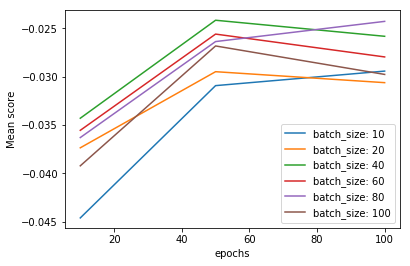

In [5]:
import matplotlib.pyplot as plt

Gammas = epochs
Cs = batch_size

scores = [x[1] for x in grid_result.grid_scores_]
scores = np.array(scores).reshape(len(Cs), len(Gammas))

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='batch_size: ' + str(i))
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean score')
plt.show()

In [ ]:
Gammas = batch_size 
Cs = epochs

scores = [x[1] for x in grid_result.grid_scores_]
scores = np.array(scores).reshape(len(Cs), len(Gammas))

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='epochs: ' + str(i))
plt.legend()
plt.xlabel('batch_size')
plt.ylabel('Mean score')
plt.show()

In [6]:

print('The parameters of the best model are: ')
print(grid_result.best_params_)

# validator.best_estimator_ returns sklearn-wrapped version of best model.
# validator.best_estimator_.model returns the (unwrapped) keras model
best_model = grid_result.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = best_model.evaluate(x_test, y_test)
for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)

The parameters of the best model are: 
{'epochs': 50, 'batch_size': 40}
1696/2060 [=======================>......] - ETA: 0sloss :  0.0427112833595
acc :  0.990291262136
